# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("output_data", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url=f'http://api.openweathermap.org/data/2.5/weather?&APPID={weather_api_key}&units=imperial&q='

weather_data = pd.DataFrame(columns=['City','Latitude','Longitude','Max Temp(F)',
                                    'Humidity(%)','Cloudiness(%)','Wind Speed (mph)','Country','Date'])

print("Beginning Data Retrieval")
print('-----------------------------')


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = base_url + city

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    #Use 'try' as a city name from my list does not exist in the API call
    try:
        # Parse the response, retrieve data and append to the dataframe
        response = requests.get(city_url).json()
        weather_data=weather_data.append({'City':response['name'],
                                  'Latitude':response['coord']['lat'],
                                  'Longitude':response['coord']['lon'],
                                  'Max Temp(F)':response['main']['temp_max'],
                                  'Humidity(%)':response['main']['humidity'],
                                  'Cloudiness(%)':response['clouds']['all'],
                                  'Wind Speed (mph)':response['wind']['speed'],
                                  'Country':response['sys']['country'],
                                  'Date':response['dt']
                                 }, ignore_index=True)
        #Skip the city if not found 
    except:
        print(f'City not found.  Skipping...')
        pass
    
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")  

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | mukhen
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | pontes e lacerda
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | kahului
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | kondinskoye
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | puerto el triunfo
Processing Record 15 of Set 1 | taburao
City not found.  Skipping...
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | illoqqortoormiut
City not found.  Skipp

Processing Record 34 of Set 4 | saurimo
Processing Record 35 of Set 4 | leningradskiy
Processing Record 36 of Set 4 | ponta do sol
Processing Record 37 of Set 4 | sekoma
Processing Record 38 of Set 4 | vardo
Processing Record 39 of Set 4 | busselton
Processing Record 40 of Set 4 | coquimbo
Processing Record 41 of Set 4 | sungairaya
Processing Record 42 of Set 4 | ken caryl
Processing Record 43 of Set 4 | dujuma
City not found.  Skipping...
Processing Record 44 of Set 4 | naze
Processing Record 45 of Set 4 | chifeng
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | cheyur
City not found.  Skipping...
Processing Record 48 of Set 4 | hailar
Processing Record 49 of Set 4 | beringovskiy
Processing Record 50 of Set 4 | cermik
Processing Record 1 of Set 5 | moron
Processing Record 2 of Set 5 | killybegs
Processing Record 3 of Set 5 | kapit
Processing Record 4 of Set 5 | victoria
Processing Record 5 of Set 5 | one hundred mile house
City not found.  Skipping...
Processin

Processing Record 24 of Set 8 | saldanha
Processing Record 25 of Set 8 | hobyo
Processing Record 26 of Set 8 | moroni
Processing Record 27 of Set 8 | campos sales
Processing Record 28 of Set 8 | tiznit
Processing Record 29 of Set 8 | palera
Processing Record 30 of Set 8 | kralendijk
Processing Record 31 of Set 8 | taitung
Processing Record 32 of Set 8 | muros
Processing Record 33 of Set 8 | mayo
Processing Record 34 of Set 8 | ostersund
Processing Record 35 of Set 8 | samarai
Processing Record 36 of Set 8 | fort smith
Processing Record 37 of Set 8 | sisimiut
Processing Record 38 of Set 8 | boyuibe
Processing Record 39 of Set 8 | ibadan
Processing Record 40 of Set 8 | jinchang
Processing Record 41 of Set 8 | guaruja
Processing Record 42 of Set 8 | port augusta
Processing Record 43 of Set 8 | odweyne
Processing Record 44 of Set 8 | quixeramobim
Processing Record 45 of Set 8 | natal
Processing Record 46 of Set 8 | am timan
Processing Record 47 of Set 8 | labuhan
Processing Record 48 of Se

Processing Record 14 of Set 12 | strezhevoy
Processing Record 15 of Set 12 | salekhard
Processing Record 16 of Set 12 | kuche
City not found.  Skipping...
Processing Record 17 of Set 12 | bilma
Processing Record 18 of Set 12 | sawtell
Processing Record 19 of Set 12 | vaitupu
City not found.  Skipping...
Processing Record 20 of Set 12 | buin
Processing Record 21 of Set 12 | aykhal
Processing Record 22 of Set 12 | touros
Processing Record 23 of Set 12 | biak
Processing Record 24 of Set 12 | tatawin
Processing Record 25 of Set 12 | puerto penasco
Processing Record 26 of Set 12 | beira
Processing Record 27 of Set 12 | ust-kamchatsk
City not found.  Skipping...
Processing Record 28 of Set 12 | tokmak
Processing Record 29 of Set 12 | lagoa
Processing Record 30 of Set 12 | huangpu
Processing Record 31 of Set 12 | griffith
Processing Record 32 of Set 12 | ohara
Processing Record 33 of Set 12 | mansa
Processing Record 34 of Set 12 | tomatlan
Processing Record 35 of Set 12 | kimbe
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data.head()

,City,Latitude,Longitude,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed (mph),Country,Date
0,Cape Town,-33.9258,18.4232,77.11,70,0,14.97,ZA,1666192968
1,Mukhen,48.1000,136.1000,37.36,65,55,8.59,RU,1666192969
2,Pevek,69.7008,170.3133,26.37,96,100,7.11,RU,1666192969
3,Pontes e Lacerda,-15.2261,-59.3353,95.34,39,83,3.74,BR,1666192970
4,Puerto Ayora,-0.7393,-90.3518,73.36,89,86,5.99,EC,1666192970


In [5]:
# write the DataFrame data to the csv file
weather_data.to_csv("../output_data/cities.csv", encoding='utf-8', index=False, header=True)

# Close the csv file
# csvfile.close()

In [6]:
weather_data.count()
weather_data.describe()

,Latitude,Longitude,Max Temp(F),Wind Speed (mph)
count,548.000000,548.000000,548.000000,548.000000
mean,18.740677,18.199957,63.694088,8.839708
std,32.826081,88.921039,20.490500,6.415375
min,-54.800000,-175.200000,-7.890000,0.000000
25%,-8.318125,-59.550025,47.662500,4.290000
50%,20.912850,22.837000,69.990000,7.310000
75%,46.534350,93.918050,79.055000,11.530000
max,78.218600,179.316700,101.370000,41.430000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#Maximum humidity of the dataframe 
Maximum_Humidity= weather_data["Humidity(%)"].max()
print(Maximum_Humidity)

100


Skipping this step as none of my cities have humidity >100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

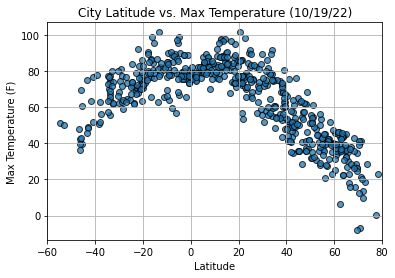

In [10]:
#Build a scatter plot for Latitude vs Temperature plot
plt.scatter(weather_data["Latitude"],weather_data["Max Temp(F)"], edgecolors='black', alpha=0.75)

plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set limits and show the grid
plt.xlim([-60,80])
plt.grid()

plt.savefig('../output_data/latitude_temp_plot.png')
plt.show()


Observations:

As O degrees Latitude represents Equator, it is clear that the "Maximum temperature" increases as you get closed to the equator.

## Latitude vs. Humidity Plot

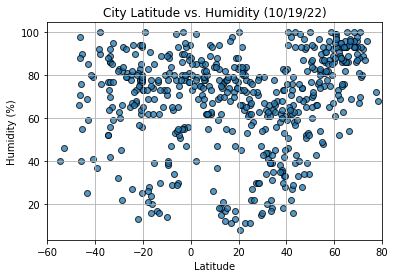

In [11]:
# Generate the scatter plot showing all the humidity of the cities vs. their latitudinal position
plt.scatter(weather_data["Latitude"],weather_data['Humidity(%)'], edgecolors='black', alpha=0.75)

# Create titles and labels for graph
plt.title(f'City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set limits and turn on grid
plt.xlim([-60,80])
plt.grid()

plt.savefig('../output_data/lat_humid_plot.png')
plt.show()

Observations:

There is no clear corelation in this graph, though it appears that majority of the cities south of equator have humidity above 60. 

## Latitude vs. Cloudiness Plot

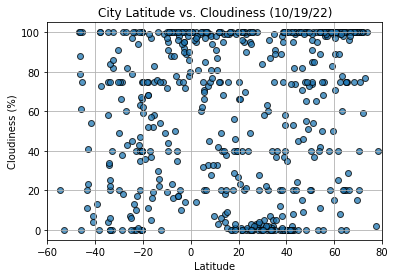

In [12]:
# Generate the scatter plot showing all the Cloudiness of the cities vs. their latitudinal position
plt.scatter(weather_data["Latitude"],weather_data['Cloudiness(%)'], edgecolors='black', alpha=0.75)

# Create titles and labels for graph
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set limits and turn on grid
plt.xlim([-60,80])
plt.grid()

plt.savefig('../output_data/lat_cloudiness_plot.png')
plt.show()

Observations:

No clear pattern with respect to the distance from equator. However, it appears that most cities hae cloudiness rank close to the values 0,20,40,80,100.

## Latitude vs. Wind Speed Plot

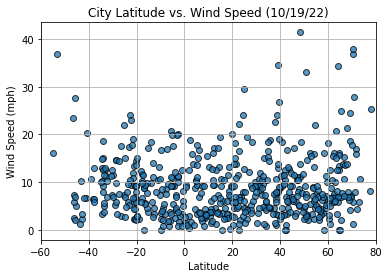

In [13]:
# Generate the scatter plot showing all the Wind speed in the cities vs. their latitudinal position
plt.scatter(weather_data["Latitude"],weather_data['Wind Speed (mph)'], edgecolors='black', alpha=0.75)

# Create titles and labels for graph
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set limits and turn on grid
plt.xlim([-60,80])
plt.grid()

plt.savefig('../output_data/lat_windspeed_plot.png')
plt.show()

Observations:

1) Most cities have wind speed between 0 and 15mph.
2) The cities that have latitude <-40 and > 40 have the highest wind speed (> 25mph)

## Linear Regression

In [14]:
#Creating a function to achieve linear regression plots
def linear_regress_plot(x_values, y_values, x_label, y_label, x_limits, x_eq_loc, y_eq_loc):
    
    # Calculate the linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create the linear regression equation    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create labels for graph
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Set limits
    plt.xlim(x_limits)

    # Generate the scatter plot
    plt.scatter(x_values, y_values, alpha=1)
    
    # Display the r-squared value
    print(f'The r-squared is: {rvalue**2}')
    
    # Calculate the values & plot the linear regression equation
    regress_values = slope * x_values + intercept
    plt.plot(x_values, regress_values, color='r')
    
    # Add the linear regression equation string to the figure
    plt.annotate(line_eq, (x_eq_loc,y_eq_loc), color='r', fontsize=14)
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = weather_data.loc[(weather_data["Latitude"] >= 0)]
southern_hemi_df = weather_data.loc[(weather_data["Latitude"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7780671333765585


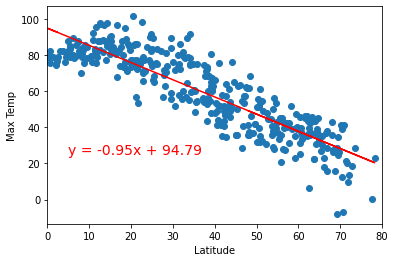

In [18]:
# Call the linear regression plot function to compare latitude and Max Temperature in the Northern Hemisphere
linear_regress_plot(northern_hemi_df['Latitude'], northern_hemi_df['Max Temp(F)'], 'Latitude', 'Max Temp', [0,80], 5, 25)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4201182349184395


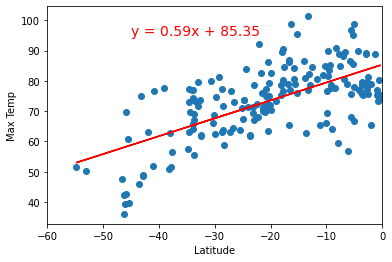

In [19]:
# Call the linear regression plot function to compare latitude and Max Temperature in the Southern Hemisphere
linear_regress_plot(southern_hemi_df['Latitude'], southern_hemi_df['Max Temp(F)'], 'Latitude', 'Max Temp', [-60,0], -45, 95)

Observations:

As the strength of the correlation can be explained based on the r-squared, one could make the below observations from the above 2 graphs.

1) In the northern hemisphere, there is a strong negative correlation between the maximum temperature and the latitude. In other words, the cities are more closer to the regression line, indicating that the temperatures are decreasing as we go away from the equator(moving close to the poles).
2) In the southern hemisphere, there is a good correlation between the maxium temperature and the latitude, though it is a little bit weaker as cities are little farther from the regression line. Also, the temperatures are dropping as we move away from the equator and moving towards the poles.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08153513789496036


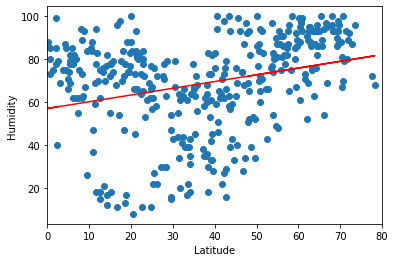

In [21]:
# Call the linear regression plot function to compare latitude and Humidity in the Northern Hemisphere
linear_regress_plot(northern_hemi_df['Latitude'].astype(float), northern_hemi_df['Humidity(%)'].astype(float), 'Latitude', 'Humidity', [0,80], 45, 0)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00013971857158833953


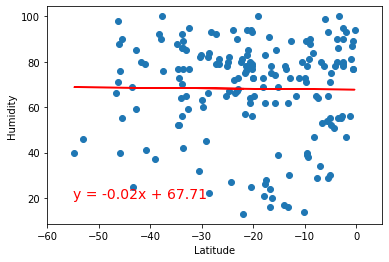

In [25]:
# Call the linear regression plot function to compare latitude and Humidity in the Southern Hemisphere
linear_regress_plot(southern_hemi_df['Latitude'].astype(float), southern_hemi_df['Humidity(%)'].astype(float), 'Latitude', 'Humidity', [-60,5], -55, 20)

Observations:

1) In Northern Hemisphere, there is a weak positive correlation between latitude and humidity. Most cities above 50 degrees or below 20 degrees latitude seem to have higher himidity.
2) In Southern Hemisphere, there is a weak negative correlation between latitude and humidity. There is no clear pattern though most cities have higher humidity in the south.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.024235354003204226


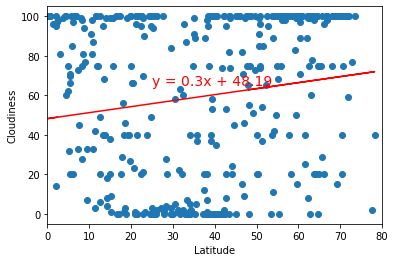

In [26]:
# Call the linear regression plot function to compare latitude and Cloudiness in the Northern Hemisphere
linear_regress_plot(northern_hemi_df['Latitude'].astype(float), northern_hemi_df['Cloudiness(%)'].astype(float), 'Latitude', 'Cloudiness', [0,80], 25, 65)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08874412258433641


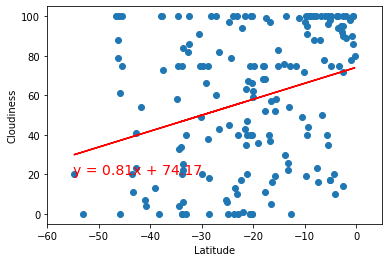

In [27]:
# Call the linear regression plot function to compare latitude and Cloudiness in the Southern Hemisphere
linear_regress_plot(southern_hemi_df['Latitude'].astype(float), southern_hemi_df['Cloudiness(%)'].astype(float), 'Latitude', 'Cloudiness', [-60,5], -55, 20)

Observations:

1) Both the hemispheres have weak positive correlation between latitude and cloudiness. 
2) In Northern Hemisphere, cloudiness is present equally across all the latitudes.
3) In Southern hemisphere, cloudiness is similar across all the latitudes though there seems to be more cities with 00% cloudiness near the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028209102852658693


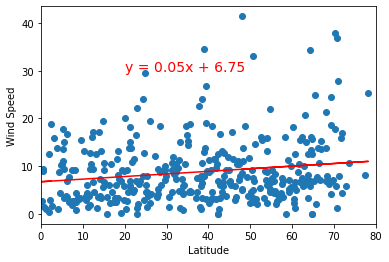

In [30]:
# Call the linear regression plot function to compare latitude and Wind Speed in the Northern Hemisphere
linear_regress_plot(northern_hemi_df['Latitude'].astype(float), northern_hemi_df['Wind Speed (mph)'].astype(float), 'Latitude', 'Wind Speed', [0,80], 20, 30)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04228616416507277


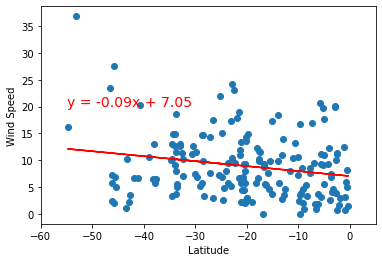

In [31]:
# Call the linear regression plot function to compare latitude and Wind Speed in the Southern Hemisphere
linear_regress_plot(southern_hemi_df['Latitude'].astype(float), southern_hemi_df['Wind Speed (mph)'].astype(float), 'Latitude', 'Wind Speed', [-60,5], -55, 20)

Observations:

1) In northern hemisphere, there is a weak positive correlation between wind speed and the position of the city. Most of the cities across all latitudes have wind speed less than 20mph with some outliers away from the equator.
3) In southern hemisphere, there is a weak negative correlation between wind speed and the position of the city. Most of the cities situated beabove -40 degrees latitude have wind speeds <15mph with several outliers. 